<a href="https://www.kaggle.com/code/omaraboelnaga/car-price-prediction?scriptVersionId=190513837" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# EDA and Data Cleaning

In [2]:
df = pd.read_csv("/kaggle/input/car-price-prediction-challenge/car_price_prediction.csv")
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [3]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [5]:
df = df.drop("ID" , axis = 1)

In [6]:
df['Mileage'] = df['Mileage'].str.replace(' km', '').astype(int)

In [7]:
df = df.reset_index(drop=True)
for i in range(len(df)):
    if str(df.loc[i, "Engine volume"])[-5:] == "Turbo":
        df.loc[i, 'Turbo'] = 1
        df.loc[i,"Engine volume"] = float(df.loc[i,"Engine volume"].replace('Turbo', ''))
    else:
        df.loc[i, 'Turbo'] = 0
        df.loc[i, 'Engine volume'] = float(df.loc[i, 'Engine volume'])
df['Engine volume'] = pd.to_numeric(df['Engine volume'])

In [8]:
duplicateRows = df[df.duplicated()]
duplicateRows

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
192,314,1053,MERCEDES-BENZ,E 350,2014,Sedan,Yes,Diesel,3.5,149486,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,0.0
239,2901,503,HONDA,Civic,2012,Sedan,Yes,Hybrid,1.5,146403,4.0,Automatic,Front,04-May,Left wheel,White,0,0.0
264,392,1017,MERCEDES-BENZ,E 300,2017,Sedan,Yes,Petrol,2.0,1600,4.0,Automatic,Rear,04-May,Left wheel,Black,12,0.0
331,282,289,FORD,Escape,2008,Jeep,Yes,Hybrid,0.4,220474,4.0,Automatic,Front,04-May,Left wheel,Grey,0,0.0
347,39829,1811,LEXUS,GX 460,2010,Jeep,Yes,Petrol,4.6,155821,8.0,Automatic,4x4,04-May,Left wheel,Black,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19222,10036,639,HYUNDAI,Sonata,2014,Sedan,Yes,LPG,2.0,735970,4.0,Automatic,Front,04-May,Left wheel,Silver,4,0.0
19227,29793,1053,MERCEDES-BENZ,E 350,2014,Sedan,Yes,Diesel,3.5,219030,6.0,Automatic,4x4,04-May,Left wheel,Black,12,0.0
19228,706,1850,MERCEDES-BENZ,E 350,2008,Sedan,Yes,Diesel,3.5,122874,6.0,Automatic,Rear,04-May,Left wheel,Black,12,0.0
19231,5802,1055,MERCEDES-BENZ,E 350,2013,Sedan,Yes,Diesel,3.5,107800,6.0,Automatic,Rear,04-May,Left wheel,Grey,12,0.0


#### Many duplicates were detected 

In [9]:
df  =df.drop_duplicates(subset=None, keep='first', inplace=False)

In [10]:
df['Levy'] = pd.to_numeric(df['Levy'], errors='coerce')
df['Levy'].fillna(0, inplace=True)  
df['Levy'] = df['Levy'].astype(np.float32)

In [11]:
df = df.drop("Doors",axis= 1)

In [12]:
df["Age"] =  2024 - df["Prod. year"]
df = df.drop("Prod. year", axis = 1)

In [13]:
#Detecting outliers and removing them
numeric_columns = df.select_dtypes(include='number')
data = df
for col in numeric_columns.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5*iqr
    high = q3 + 1.5*iqr
    outlier = ((numeric_columns[col] > high) | (numeric_columns[col] < low)).sum()
    total_outliers = numeric_columns[col].shape[0]
    print(f"Total Outliars in {col} are : {outlier} : {round(100*(outlier)/total_outliers,2)}%")
    if outlier>0:
        data=data[(data[col] >= low) &(data[col] <= high)]

Total Outliars in Price are : 957 : 6.09%
Total Outliars in Levy are : 135 : 0.86%
Total Outliars in Engine volume are : 713 : 4.53%
Total Outliars in Mileage are : 506 : 3.22%
Total Outliars in Cylinders are : 3446 : 21.91%
Total Outliars in Airbags are : 0 : 0.0%
Total Outliars in Turbo are : 1889 : 12.01%
Total Outliars in Age are : 756 : 4.81%


#### And here I was working on detecting outliers and cleanning data from outliers

In [14]:
 data

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo,Age
2,8467,0.0,HONDA,FIT,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2,0.0,18
3,3607,862.0,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0,0.0,13
4,11726,446.0,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4,0.0,10
5,39493,891.0,HYUNDAI,Santa FE,Jeep,Yes,Diesel,2.0,160931,4.0,Automatic,Front,Left wheel,White,4,0.0,8
6,1803,761.0,TOYOTA,Prius,Hatchback,Yes,Hybrid,1.8,258909,4.0,Automatic,Front,Left wheel,White,12,0.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19229,50,0.0,TOYOTA,Prius,Hatchback,No,Hybrid,1.5,150000,4.0,Automatic,Front,Left wheel,Silver,6,0.0,16
19230,470,645.0,TOYOTA,Prius,Hatchback,Yes,Hybrid,1.8,307325,4.0,Automatic,Front,Left wheel,Silver,12,0.0,13
19233,15681,831.0,HYUNDAI,Sonata,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,Left wheel,Red,8,0.0,13
19234,26108,836.0,HYUNDAI,Tucson,Jeep,Yes,Diesel,2.0,116365,4.0,Automatic,Front,Left wheel,Grey,4,0.0,14


# Data Visualisation

<Axes: xlabel='Levy', ylabel='Density'>

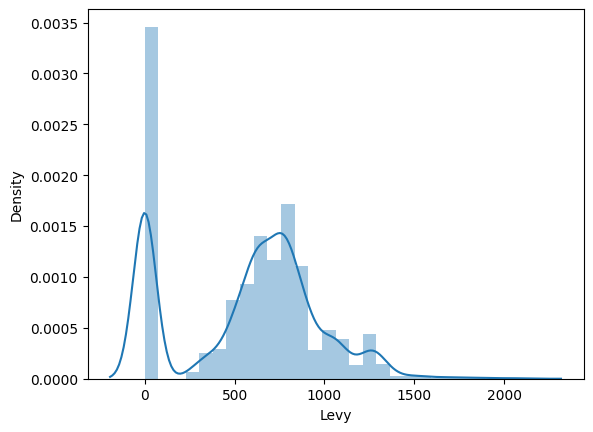

In [15]:
sns.distplot(data.Levy)

Text(0.5, 1.0, 'Price Distribution')

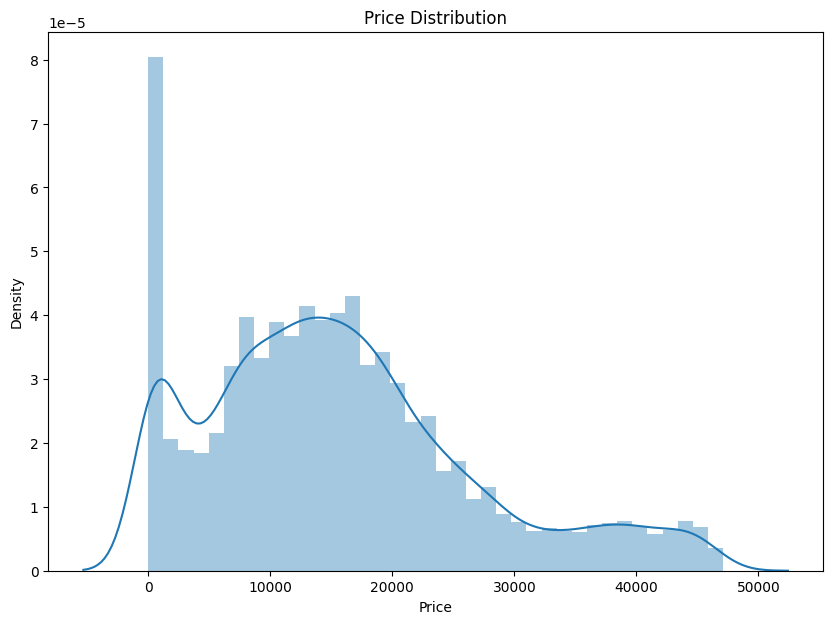

In [16]:
plt.figure(figsize=(10,7))
fig = sns.distplot(data['Price'], kde=True)
fig.set_title('Price Distribution')

Text(0.5, 1.0, 'Wheel type')

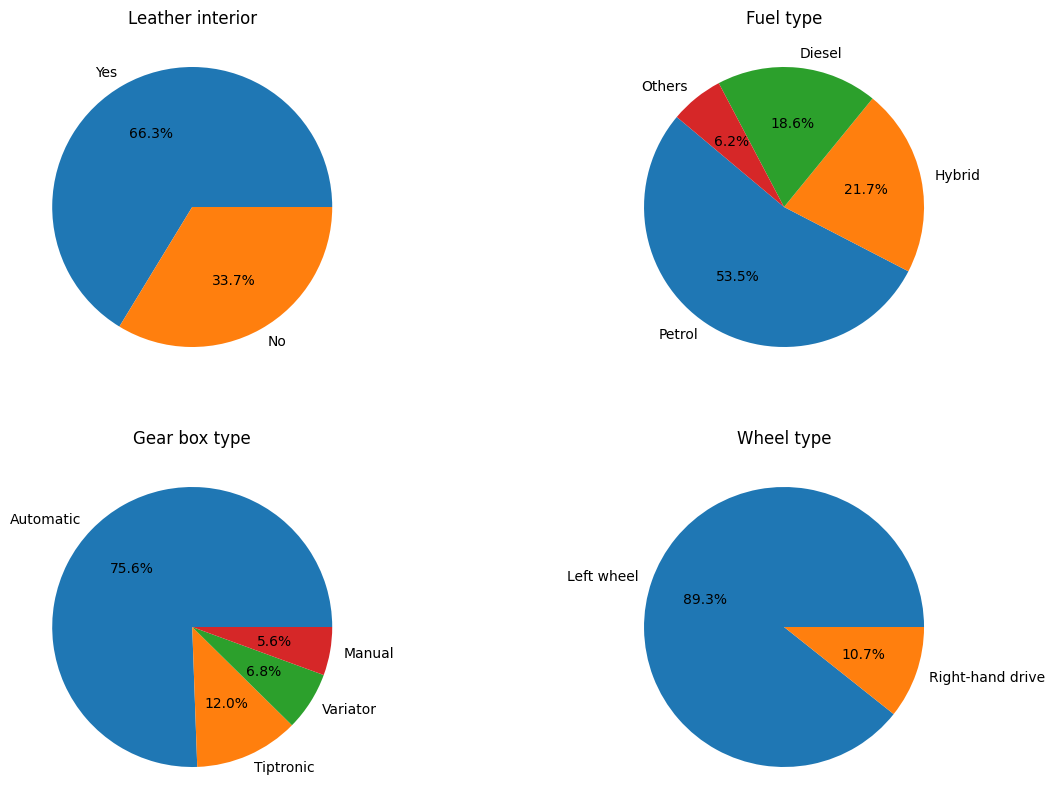

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(14,10))
axs[0, 0].pie(data["Leather interior"].value_counts(), labels=data["Leather interior"].value_counts().index, autopct='%1.1f%%')
axs[0, 0].set_title('Leather interior')
b_df = data["Fuel type"].value_counts()[:-3]
o_df = data["Fuel type"].value_counts()[-3:]
o_value = o_df.values.sum()
b_df["Others"] = o_value
axs[0, 1].pie(b_df, labels=b_df.index, autopct='%1.1f%%', startangle=140)
axs[0, 1].set_title('Fuel type')
axs[1, 0].pie(data["Gear box type"].value_counts(), labels=data["Gear box type"].value_counts().index, autopct='%1.1f%%')
axs[1, 0].set_title('Gear box type')
axs[1, 1].pie(data["Wheel"].value_counts(), labels=data["Wheel"].value_counts().index, autopct='%1.1f%%')
axs[1, 1].set_title('Wheel type')

[Text(0, 0, 'PORSCHE'),
 Text(1, 0, 'SSANGYONG'),
 Text(2, 0, 'JAGUAR'),
 Text(3, 0, 'JEEP'),
 Text(4, 0, 'HYUNDAI'),
 Text(5, 0, 'MERCURY'),
 Text(6, 0, 'SCION'),
 Text(7, 0, 'TOYOTA'),
 Text(8, 0, 'INFINITI'),
 Text(9, 0, 'CHEVROLET'),
 Text(10, 0, 'LINCOLN'),
 Text(11, 0, 'LEXUS'),
 Text(12, 0, 'KIA'),
 Text(13, 0, 'SATURN'),
 Text(14, 0, 'FORD'),
 Text(15, 0, 'SKODA'),
 Text(16, 0, 'MINI'),
 Text(17, 0, 'MITSUBISHI'),
 Text(18, 0, 'RENAULT'),
 Text(19, 0, 'HONDA')]

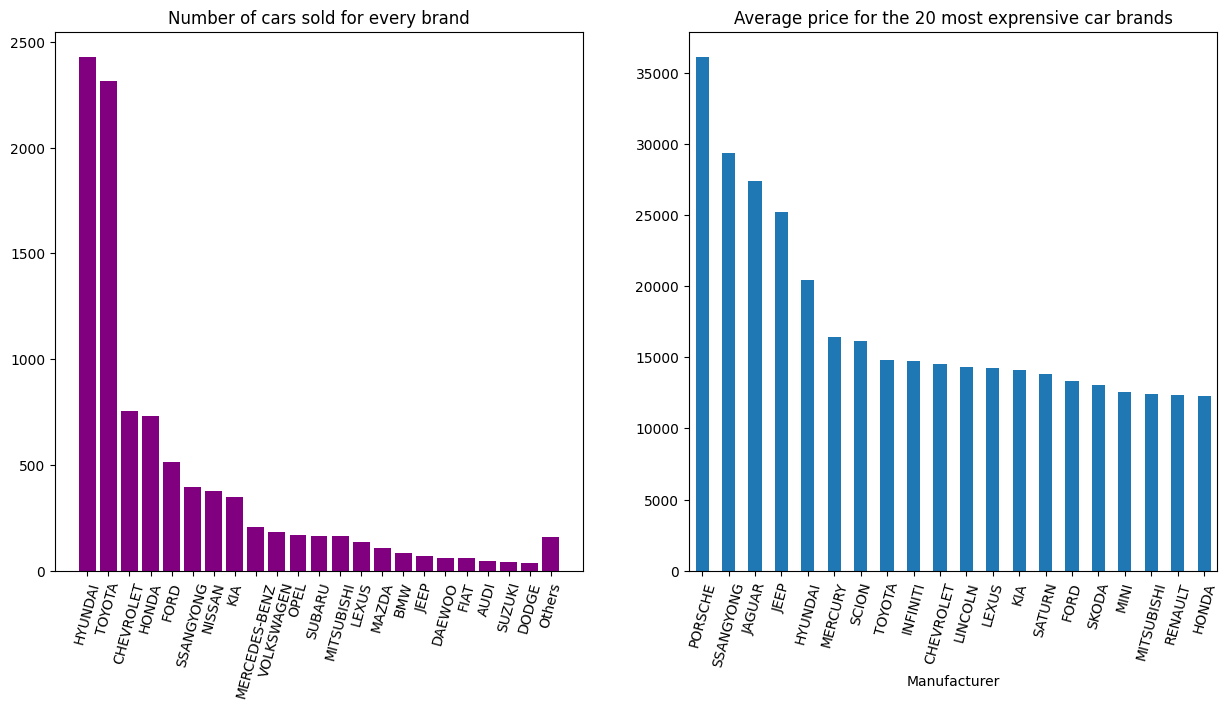

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
b_df = data["Manufacturer"].value_counts()[:22]
o_df = data["Manufacturer"].value_counts()[22:]
o_value = o_df.values.sum()
b_df["Others"] = o_value
axs[0].bar(b_df.index, b_df, color = "purple")
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=75)
axs[0].set_title("Number of cars sold for every brand")
data.groupby("Manufacturer")['Price'].mean().sort_values(ascending = False)[:20].plot(kind  ="bar",ax = axs[1])
axs[1].set_title("Average price for the 20 most exprensive car brands")
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=75)

Text(0.5, 1.0, 'Drive wheels type for each Category')

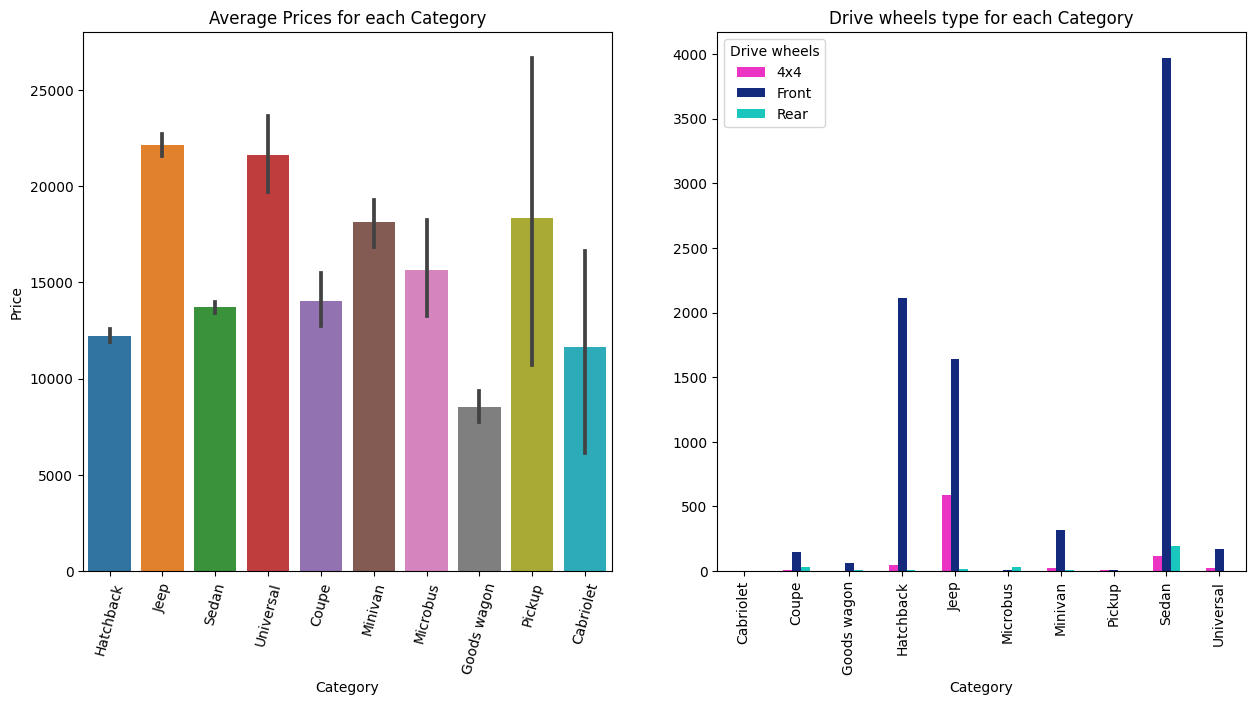

In [19]:
figure, axs = plt.subplots(1, 2,figsize=(15,7)) 
sns.barplot(x='Category', y='Price', data=data, ax=axs[0])
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=75)
axs[0].set_title("Average Prices for each Category")
pd.crosstab(df.Category, data["Drive wheels"]).plot(kind = "bar" ,color = ["#eb34c3" , "#132a7d" , "#1ac7be"] , ax = axs[1])
axs[1].set_title("Drive wheels type for each Category")

# Training and evaluating Models

In [20]:
x = data.drop('Price', axis=1)
y = data["Price"]

In [21]:
l = LabelEncoder()
columns_to_encode = ["Manufacturer", "Model", "Category", "Leather interior", "Fuel type", "Gear box type", "Drive wheels", "Color", "Wheel"]
for col in columns_to_encode:
    x[col] = l.fit_transform(x[col])

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [23]:
model_dict = {
    "RandomForestRegressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=42),
    "LinearRegression": LinearRegression(),
}

model_names = []
accuracies = []
r2Scores=[]
def models(x_train, y_train, x_test, y_test):
    for name, model in model_dict.items():
        model.fit(x_train, y_train)
        ypred =model.predict(x_test)
        r2Scores.append(r2_score(y_test,ypred))
        score = model.score(x_test, y_test)
        model_names.append(name)
        accuracies.append(score)

    # For SVR model
    model = SVR(kernel='rbf', C=5, epsilon=0.001, degree=4, gamma=0.01)
    x_cols = ["Levy", "Mileage"]
    scaler_x = StandardScaler()
    scaler_y = StandardScaler()
    
    x_train[x_cols] = scaler_x.fit_transform(x_train[x_cols])
    x_test[x_cols] = scaler_x.transform(x_test[x_cols])
    
    y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
    y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()
    
    model.fit(x_train, y_train_scaled)
    score = model.score(x_test, y_test_scaled)
    model_names.append("SVR")
    ypred =model.predict(x_test)
    r2Scores.append(r2_score(y_test_scaled,ypred))
    accuracies.append(score)

#### What I did was because SVR model requires data to be Scaled while it is not required to be scaled for RandomForest, DecisionTree and Linear Regression Models 

In [24]:
models(x_train, y_train, x_test, y_test)

[Text(0, 0, 'RandomForestRegressor'),
 Text(1, 0, 'DecisionTreeRegressor'),
 Text(2, 0, 'LinearRegression'),
 Text(3, 0, 'SVR')]

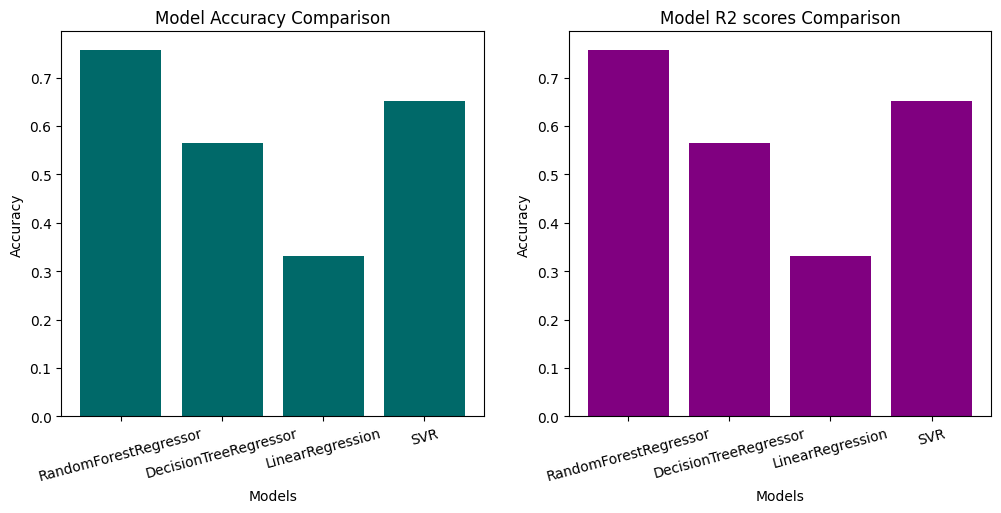

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5)) 
axs[0].bar(model_names, accuracies, color="#006969")
axs[0].set_title('Model Accuracy Comparison')
axs[0].set_xlabel('Models')
axs[0].set_ylabel('Accuracy')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=15)
axs[1].bar(model_names,r2Scores , color="purple")
axs[1].set_title('Model R2 scores Comparison')
axs[1].set_xlabel('Models')
axs[1].set_ylabel('Accuracy')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=15)